# Breast Cancer Detection

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import pandas as pd
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
dataset = r"Datasets"
Yes_path = r"Datasets\1"
No_path = r"Datasets\0"

(50, 50, 3)


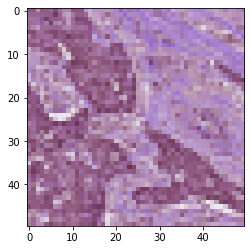

In [ ]:
img = cv2.imread(Yes_path+'\9023_idx5_x1401_y1351_class1.png')
print(img.shape)
plt.imshow(img)

In [ ]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

288
583


In [ ]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['9023_idx5_x1301_y1351_class1.png', '9023_idx5_x1301_y1401_class1.png', '9023_idx5_x1301_y1451_class1.png', '9023_idx5_x1301_y1501_class1.png', '9023_idx5_x1301_y1551_class1.png', '9023_idx5_x1301_y1601_class1.png', '9023_idx5_x1301_y1651_class1.png', '9023_idx5_x1301_y1751_class1.png', '9023_idx5_x1301_y1801_class1.png', '9023_idx5_x1301_y1851_class1.png', '9023_idx5_x1301_y1901_class1.png', '9023_idx5_x1301_y1951_class1.png', '9023_idx5_x1351_y1301_class1.png', '9023_idx5_x1351_y1351_class1.png', '9023_idx5_x1351_y1401_class1.png', '9023_idx5_x1351_y1451_class1.png', '9023_idx5_x1351_y1501_class1.png', '9023_idx5_x1351_y1551_class1.png', '9023_idx5_x1351_y1601_class1.png', '9023_idx5_x1351_y1651_class1.png', '9023_idx5_x1351_y1701_class1.png', '9023_idx5_x1351_y1751_class1.png', '9023_idx5_x1351_y1801_class1.png', '9023_idx5_x1351_y1851_class1.png', '9023_idx5_x1351_y1901_class1.png', '9023_idx5_x1351_y1951_class1.png', '9023_idx5_x1351_y2001_class1.png', '9023_idx5_x1351_y2051_clas

In [ ]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [ ]:
pathframe.__len__()
pathframe

,filepaths,labels
0,Datasets\1\9023_idx5_x1301_y1351_class1.png,Yes
1,Datasets\1\9023_idx5_x1301_y1401_class1.png,Yes
2,Datasets\1\9023_idx5_x1301_y1451_class1.png,Yes
3,Datasets\1\9023_idx5_x1301_y1501_class1.png,Yes
4,Datasets\1\9023_idx5_x1301_y1551_class1.png,Yes
...,...,...
866,Datasets\0\9023_idx5_x951_y751_class0.png,No
867,Datasets\0\9023_idx5_x951_y801_class0.png,No
868,Datasets\0\9023_idx5_x951_y851_class0.png,No
869,Datasets\0\9023_idx5_x951_y901_class0.png,No


In [ ]:
print(pathframe['labels'].value_counts())

No     583
Yes    288
Name: labels, dtype: int64


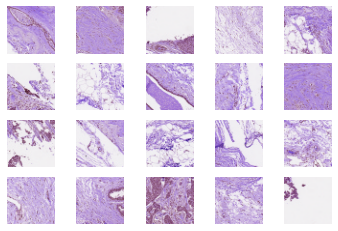

In [ ]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [ ]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(783, 2) (88, 2) (704, 2) (79, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=32, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=32, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=32, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=False)

Found 704 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(32, 150, 150, 3)


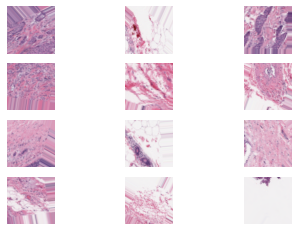

In [ ]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    plt.subplot(4,3,i+1)
    plt.imshow(val)
    plt.axis('off')
plt.show()

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=30, verbose=1)

Epoch 1/30
22/22 [==============================] - 358s 15s/step - loss: 0.2255 - accuracy: 0.9062 - val_loss: 1098.7130 - val_accuracy: 0.7342
Epoch 2/30
22/22 [==============================] - 319s 15s/step - loss: 0.2187 - accuracy: 0.9190 - val_loss: 206714372096.0000 - val_accuracy: 0.2532
Epoch 3/30
22/22 [==============================] - 317s 14s/step - loss: 0.1941 - accuracy: 0.9318 - val_loss: 197268496.0000 - val_accuracy: 0.2532
Epoch 4/30
22/22 [==============================] - 322s 15s/step - loss: 0.1953 - accuracy: 0.9276 - val_loss: 18591358.0000 - val_accuracy: 0.2532
Epoch 5/30
22/22 [==============================] - 322s 15s/step - loss: 0.1811 - accuracy: 0.9290 - val_loss: 43581980.0000 - val_accuracy: 0.2532
Epoch 6/30
22/22 [==============================] - 320s 15s/step - loss: 0.1366 - accuracy: 0.9418 - val_loss: 6526102.5000 - val_accuracy: 0.2532
Epoch 7/30
22/22 [==============================] - 319s 15s/step - loss: 0.1786 - accuracy: 0.9261 - val_

In [ ]:
model.evaluate(test_gen)

3/3 [==============================] - 8s 2s/step - loss: 4.0601 - accuracy: 0.8864


[4.060058116912842, 0.8863636255264282]

### NANDINI SURESH SHARMA
TCR-Innovation Internship Final Project (Breast Cancer Detection)